## Importing Libraries and Data

In [ ]:
%pip install matplotlib-inline

In [87]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt


In [3]:
# load in data 
df_train = pd.read_csv('C:\\Users\\jacka\\OneDrive\\Desktop\\Data Analytics\\master_datasets\\train.csv')
df_unim = pd.read_csv('C:\\Users\\jacka\\OneDrive\\Desktop\\Data Analytics\\master_datasets\\unique_m.csv')

## Viewing the Data

In [13]:
 
df2 = pd.DataFrame(df_unim.iloc[0])
df2 = df2.loc[~(df2==0).all(axis=1)]
print(df2)

                             0
O                          4.0
Cu                         1.0
Ba                         0.2
La                         1.8
critical_temp             29.0
material       Ba0.2La1.8Cu1O4


In [28]:
df_train.head()
print(df_train['range_atomic_radius'])

0        205
1        205
2        205
3        205
4        205
        ... 
21258    111
21259    205
21260     29
21261     29
21262     53
Name: range_atomic_radius, Length: 21263, dtype: int64


In [ ]:
df_train.info()

## Selecting the Features

In [14]:
# finding the best features for the model using the ANOVA f test
bestfeatures = SelectKBest(score_func=f_classif,k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Feature', 'Score']



In [15]:
# printing out the best features
important_features = feature_scores.nlargest(5,'Score')
print(important_features)
feature_list = list(important_features.iloc[:,0])

                        Feature      Score
70  wtd_std_ThermalConductivity  12.236990
27          range_atomic_radius  11.049727
67    range_ThermalConductivity  10.880292
72             wtd_mean_Valence   9.598850
30        wtd_std_atomic_radius   9.261644


### Defining Terms

wtd_std_ThermalConductivity- the weighted std of the thermoconductivity of the elements in the superconducter 
range_atomic_radius- the range of the atomic radius of the elements in the superconducter 
range_ThermalConductivity- range of thermal conductivity values for the elements in the superconducter 
wtd_mean_Valence- the weighted mean of the valence electrons in the superconducter 
wtd_std_stomic_radius- the weighted standard deviation of the atomic radius of the elements in the superconducter 

In [16]:
# create a new dataframe with the selected features for the model 
new_df = pd.DataFrame()

for feature in feature_list:
    dummy_df = df_train[feature]
    new_df = pd.concat([new_df,dummy_df],axis=1)

print(new_df.shape)
df_labels = df_train['critical_temp']

(21263, 5)


## Making Training and Testing Sets

In [ ]:
# normalize data 
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)

# back to dataframe 
normalized_df = pd.DataFrame(normalized_df)
print(normalized_df)



In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(normalized_df,df_labels,random_state=0)

## Testing Models

In [88]:
# basic kNN classifier
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,Y_train)
predicted_y = knn.predict(X_test)
print(f'The r^2 value for this model is {knn.score(X_test,Y_test)}')


The r^2 value for this model is 0.8680471846008018


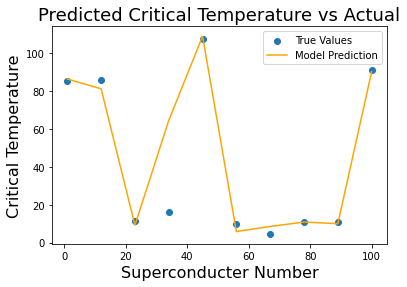

In [103]:
predicted_y_sample = predicted_y[:10]
true_y_sample = Y_test[:10]


scale = np.linspace(1,100,10)

plt.scatter(scale,true_y_sample,label='True Values')
plt.plot(scale,predicted_y_sample,color='orange',label='Model Prediction')
plt.ylabel('Critical Temperature',size=16)
plt.xlabel('Superconducter Number',size=16)
plt.title('Predicted Critical Temperature vs Actual',size=18)
plt.legend()


In [104]:
# basic linear regression model
linreg = LinearRegression().fit(X_train, Y_train)
predicted_y_lin = linreg.predict(X_test)
print(f'The r^2 for this model is {linreg.score(X_test,Y_test)}')

The r^2 for this model is 0.5714773104093356


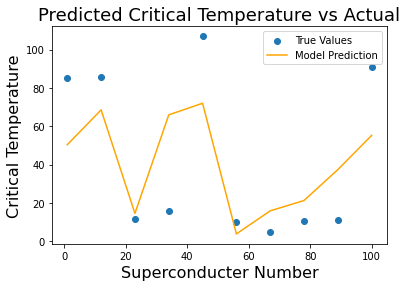

In [106]:
predicted_y_sample_lin = predicted_y_lin[:10]
true_y_sample_lin = Y_test[:10]


scale = np.linspace(1,100,10)

plt.scatter(scale,true_y_sample_lin,label='True Values')
plt.plot(scale,predicted_y_sample_lin,color='orange',label='Model Prediction')
plt.ylabel('Critical Temperature',size=16)
plt.xlabel('Superconducter Number',size=16)
plt.title('Predicted Critical Temperature vs Actual',size=18)
plt.legend()

In [75]:
def varying_alpha(alpha,model):
    if model == 'Ridge':
        linridge = Ridge(alpha=alpha).fit(X_train,Y_train)
        print(f'The r^2 score for an alpha of {alpha} is {linridge.score(X_test,Y_test)}')
    if model == 'Lasso':
        linlasso = Lasso(alpha=alpha,max_iter=10000).fit(X_train,Y_train)
        print(f'The r^2 score for an alpha of {alpha} is {linlasso.score(X_test,Y_test)}')


In [76]:

# Ridge Regression model
varying_alpha(.1,'Ridge')
varying_alpha(1,'Ridge')
varying_alpha(10,'Ridge')

The r^2 score for an alpha of 0.1 is 0.5714784538102005
The r^2 score for an alpha of 1 is 0.5714775226720363
The r^2 score for an alpha of 10 is 0.5706750605400452


In [81]:
# Lasso regression 
varying_alpha(.1,'Lasso')
varying_alpha(1,'Lasso')
varying_alpha(5,'Lasso')


The r^2 score for an alpha of 0.1 is 0.5618569840305766
The r^2 score for an alpha of 1 is 0.5366823626893104
The r^2 score for an alpha of 5 is 0.31682027669684687
